# Exercise  Crime Dataset (Regression)

# Communities and Crime Data Set

In [100]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
#%matplotlib inline
attrib = read_csv('attributes.csv', delim_whitespace = True)
data = read_csv('communities.data', names = attrib['attributes'])

In [101]:
print(data.shape)

(1994, 128)


In [102]:
data.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45          ?   
2         ...               0.01     0.21            0.02          ?   
3         ...               0.02     0.39            0.28          ?   
4         ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00                ?                 0.67  
2                 0.00                ?                 0.43  
3                 0.00                ?                 0.12  
4                 0.00                ?                 0.03  

[5 rows x 128 columns]

Remove non-predictive features
- **state**: US state (by number) - not counted as predictive above, but if considered, should be considered nominal (nominal)
- **county**: numeric code for county - not predictive, and many missing values (numeric)
- **community**: numeric code for community - not predictive and many missing values (numeric)
- **communityname**: community name - not predictive - for information only (string)
- **fold**: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [103]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45          ?   
2         ...               0.01     0.21            0.02          ?   
3         ...               0.02     0.39            0.28          ?   
4         ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00                ?                 0.67  
2                 0.00                ?                 0.43  
3                 0.00                ?                 0.12  
4                 0.00                ?                 0.03  

[5 rows x 123 columns]

In [104]:
from pandas import DataFrame

data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]

In [105]:
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

$\Longrightarrow$ From 122 predictive features 23 contain missing values.

In [106]:
# Look at the features with missing values

data[feat_miss[0:13]].describe()

OtherPerCap LemasSwornFT LemasSwFTPerPop LemasSwFTFieldOps  \
count         1993          319             319               319   
unique          97           38              52                34   
top              0         0.02             0.2              0.98   
freq           129           80              19                81   

       LemasSwFTFieldPerPop LemasTotalReq LemasTotReqPerPop PolicReqPerOffic  \
count                   319           319               319              319   
unique                   55            44                59               75   
top                    0.19          0.02              0.14             0.23   
freq                     17            55                23               15   

       PolicPerPop RacialMatchCommPol PctPolicWhite PctPolicBlack PctPolicHisp  
count          319                319           319           319          319  
unique          52                 76            74            73           54  
top            0.2               0.78          0.97             0            0  
freq            19                 12            11            23           72

In [107]:
data[feat_miss[13:23]].describe()

PctPolicAsian PctPolicMinor OfficAssgnDrugUnits NumKindsDrugsSeiz  \
count            319           319                 319               319   
unique            50            72                  30                15   
top                0          0.07                0.03              0.57   
freq             189            14                  48                54   

       PolicAveOTWorked PolicCars PolicOperBudg LemasPctPolicOnPatr  \
count               319       319           319                 319   
unique               77        63            38                  72   
top                0.19      0.02          0.02                0.74   
freq                 12        27            69                  13   

       LemasGangUnitDeploy PolicBudgPerPop  
count                  319             319  
unique                   3              51  
top                      0            0.12  
freq                   126              22

**OtherPerCap** has only one missing value and will be filled by a mean value using Imputer from sklearn.preprocessing. The others features present many missing values and will be removed from the data set.

In [108]:
# Impute mean values for samples with missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])

#imputer = imputer.fit(data[feat_miss])
#data[feat_miss] = imputer.transform(data[feat_miss])
#data[feat_miss].describe()

In [109]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           PctForeignBorn  PctBornSameState  PctSameHouse85  \
0         ...                     0.12              0.42            0.50   
1         ...                     0.21              0.50            0.34   
2         ...                     0.14              0.49            0.54   
3         ...                     0.19              0.30            0.73   
4         ...                     0.11              0.72            0.64   

   PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  \
0           0.51            0.64      0.12     0.26            0.20   
1           0.60            0.52      0.02     0.12            0.45   
2           0.67            0.56      0.01     0.21            0.02   
3           0.64            0.65      0.02     0.39            0.28   
4           0.61            0.53      0.04     0.09            0.02   

   LemasPctOfficDrugUn  ViolentCrimesPerPop  
0                 0.32                 0.20  
1                 0.00                 0.67  
2                 0.00                 0.43  
3                 0.00                 0.12  
4                 0.00                 0.03  

[5 rows x 101 columns]

In [110]:
data.describe()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  1994.000000    1994.000000   1994.000000   1994.000000   1994.000000   
mean      0.057593       0.463395      0.179629      0.753716      0.153681   
std       0.126906       0.163717      0.253442      0.244039      0.208877   
min       0.000000       0.000000      0.000000      0.000000      0.000000   
25%       0.010000       0.350000      0.020000      0.630000      0.040000   
50%       0.020000       0.440000      0.060000      0.850000      0.070000   
75%       0.050000       0.540000      0.230000      0.940000      0.170000   
max       1.000000       1.000000      1.000000      1.000000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24   agePct65up  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean      0.144022     0.424218     0.493867     0.336264     0.423164   
std       0.232492     0.155196     0.143564     0.166505     0.179185   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.010000     0.340000     0.410000     0.250000     0.300000   
50%       0.040000     0.400000     0.480000     0.290000     0.420000   
75%       0.160000     0.470000     0.540000     0.360000     0.530000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              ...           PctForeignBorn  PctBornSameState  PctSameHouse85  \
count         ...              1994.000000       1994.000000     1994.000000   
mean          ...                 0.215552          0.608892        0.535050   
std           ...                 0.231134          0.204329        0.181352   
min           ...                 0.000000          0.000000        0.000000   
25%           ...                 0.060000          0.470000        0.420000   
50%           ...                 0.130000          0.630000        0.540000   
75%           ...                 0.280000          0.777500        0.660000   
max           ...                 1.000000          1.000000        1.000000   

       PctSameCity85  PctSameState85     LandArea      PopDens  \
count    1994.000000     1994.000000  1994.000000  1994.000000   
mean        0.626424        0.651530     0.065231     0.232854   
std         0.200521        0.198221     0.109459     0.203092   
min         0.000000        0.000000     0.000000     0.000000   
25%         0.520000        0.560000     0.020000     0.100000   
50%         0.670000        0.700000     0.040000     0.170000   
75%         0.770000        0.790000     0.070000     0.280000   
max         1.000000        1.000000     1.000000     1.000000   

       PctUsePubTrans  LemasPctOfficDrugUn  ViolentCrimesPerPop  
count     1994.000000          1994.000000          1994.000000  
mean         0.161685             0.094052             0.237979  
std          0.229055             0.240328             0.232985  
min          0.000000             0.000000             0.000000  
25%          0.020000             0.000000             0.070000  
50%          0.070000             0.000000             0.150000  
75%          0.190000             0.000000             0.330000  
max          1.000000             1.000000             1.000000  

[8 rows x 101 columns]

## Formulate data instances

In [111]:
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_test.shape)

(1994, 100)
(1994,)
(1395, 100)
(599,)


## Model Selection - Cross Validation

In [112]:
def myplot(XX, yy):
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = make_scorer(r2_score))
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (+/- %.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('R2')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('RDG',Ridge(alpha=1)))
# models.append(('SVR', SVR()))
#models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
#models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.643 (+/- 0.029)
RDG: 0.662 (+/- 0.024)


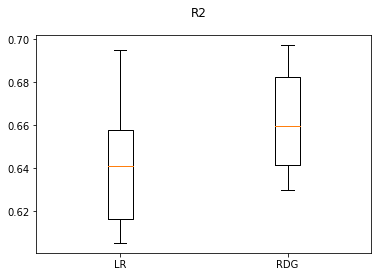

In [114]:
myplot(X_train, y_train)

Scores results ($R^2$, MSE and MAE) of the cross-validation indicate that **Linear Regression** has the best performance among the analyzed models and will be used for generalization. This approach is also called **Principal Component Regression**, i.e. a set of principal components, $Z_1,..., Z_M$ are used as the predictors in a linear regression model.

# Household Power Consumption

In [115]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [116]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [118]:
df.shape

(2075259, 7)

In [119]:

df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

# processing missing values

In [120]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [121]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [122]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [123]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [124]:
df.shape

(2075259, 7)

In [125]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [126]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [127]:
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values 


# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
values = reframed.values
X = values[:,:-1]
Y = values[:,-1]
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
1   0.782418  0.545045  0.103358  0.335501  0.541487      0.0  0.144652   
2   0.782676  0.509006  0.110073  0.283802  0.502152      0.0  0.030869   
3   0.774169  0.488550  0.096987  0.315987  0.481110      0.0  0.000000   
4   0.778809  0.455597  0.099010  0.434417  0.449904      0.0  0.008973   
5   0.798917  0.322555  0.072536  0.495847  0.323529      0.0  0.002872   

    var7(t)  
1  0.782676  
2  0.774169  
3  0.778809  
4  0.798917  
5  0.205723  


LR: 0.792 (+/- 0.004)
RDG: 0.769 (+/- 0.003)


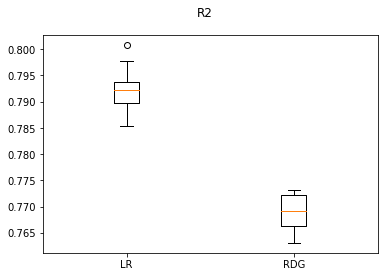

In [129]:
myplot(X, Y)